In [162]:
#importing all the necessary modules and libraries

import pandas     as pd
import numpy      as np
import matplotlib.pyplot as plt
import seaborn    as sns
import missingno  as msno

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to include the graph and save in this notebook 
%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm  import SVR
from   sklearn import metrics
from   sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import time
from datetime import datetime

In [95]:
#connecting data from sql to python

import pyodbc 

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-A96I9EI;'
                      'Database=Insurance_Premium_Prediction;'
                      'Trusted_Connection=yes;')

data = pd.read_sql_query('SELECT * from insurance',conn)
cursor = conn.cursor()

In [96]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [97]:
!pip install pandas-profiling

In [98]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output1.html')

In [99]:
data.profile_report()

In [100]:
# pandas_profiling.version.__version__
# profile = ProfileReport(df, minimal=True)
# profile.to_file(output_file="output_min.html")

In [101]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [102]:
data.shape

(1338, 7)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
#stats data for all numeric data
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [105]:
#includes nan and nominal data as well
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [106]:
data.duplicated().sum()

1

In [107]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.shape

(1337, 7)

In [110]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [111]:
data.isnull().sum().sum()
#data.isnull().sum().any()

0

<AxesSubplot:>

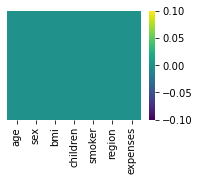

In [112]:
plt.figure(figsize=(3,2))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [113]:
list(data)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [114]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [115]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [116]:
data.columns[data.dtypes !=object]

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [117]:
data.columns[data.dtypes == object]

Index(['sex', 'smoker', 'region'], dtype='object')

In [118]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [119]:
data['sex'].value_counts()
#data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [120]:
#{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}
#numerical_cols = data.select_dtypes('int').columns
#numerical_cols = data.select_dtypes('object').columns

numerical_cols = data.select_dtypes(include=['number']).columns
print(numerical_cols)

categorical_cols = data.select_dtypes(exclude=['number']).columns
print(categorical_cols)

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [121]:
for feature in categorical_cols:
    print(data[feature].value_counts().sort_values())
    
    
# print(data['sex'].value_counts().sort_values()) 
# print(data['smoker'].value_counts().sort_values())
# print(data['region'].value_counts().sort_values())

female    662
male      675
Name: sex, dtype: int64
yes     274
no     1063
Name: smoker, dtype: int64
northwest    324
northeast    324
southwest    325
southeast    364
Name: region, dtype: int64


In [122]:
data.groupby('sex').mean()

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.946667,30.945778,1.117037,13974.999111


In [123]:
data.groupby('smoker').mean()

,age,bmi,children,expenses
smoker,,,,
no,39.404516,30.653246,1.091251,8440.660461
yes,38.514599,30.713139,1.113139,32050.231971


In [124]:
data.groupby('region').mean()

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.259259,29.197531,1.151235,12450.840648
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [125]:
data.groupby('children').mean()

,age,bmi,expenses
children,,,
0,38.478185,30.553403,12384.695515
1,39.453704,30.623765,12731.171821
2,39.445833,30.979167,15073.564000
3,41.566879,30.688535,15355.318535
4,39.000000,31.388000,13850.656800
5,35.611111,29.600000,8786.035556


<AxesSubplot:xlabel='smoker', ylabel='count'>

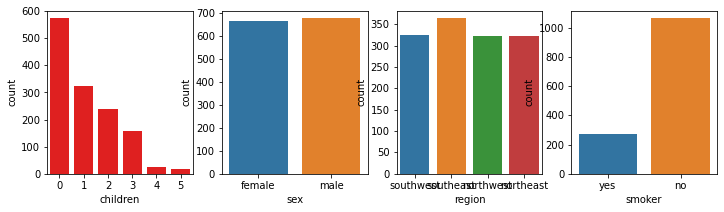

In [126]:
fig,axes=plt.subplots(1,4,figsize=(12,3))
sns.countplot(x='children',data=data,color='red',ax=axes[0])
sns.countplot(x='sex',data=data,ax=axes[1])
sns.countplot(x='region',data=data,ax=axes[2])
sns.countplot(x='smoker',data=data,ax=axes[3])

In [127]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# visualizing numerical columns

<AxesSubplot:xlabel='children', ylabel='Count'>

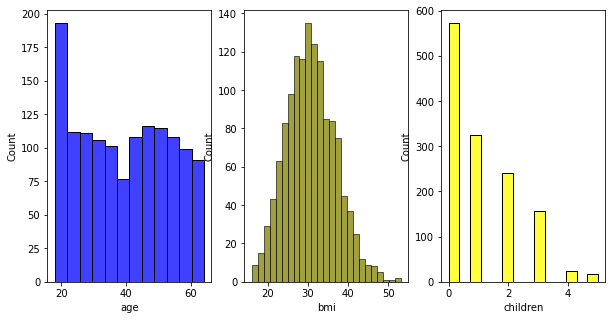

In [128]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
sns.histplot(data['age'],color='blue',ax=axes[0])
sns.histplot(data['bmi'],color='olive',ax=axes[1])
sns.histplot(data['children'],color='yellow',ax=axes[2])

# Finding Outliers

<AxesSubplot:xlabel='expenses'>

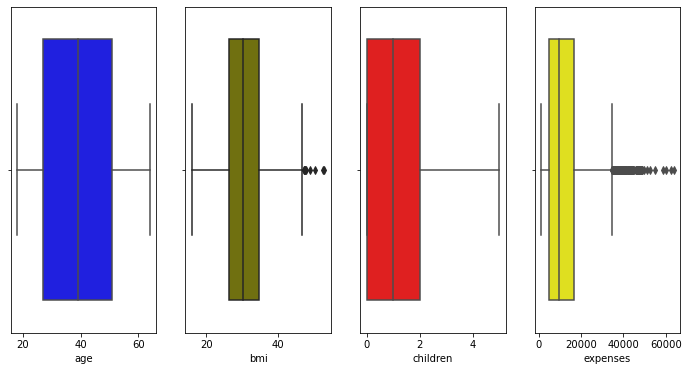

In [129]:
fig,axes=plt.subplots(1,4,figsize=(12,6))
sns.boxplot(data['age'],color='blue',ax=axes[0])
sns.boxplot(data['bmi'],color='olive',ax=axes[1])
sns.boxplot(data['children'],color='red',ax=axes[2])
sns.boxplot(data['expenses'],color='yellow',ax=axes[3])

<AxesSubplot:xlabel='bmi'>

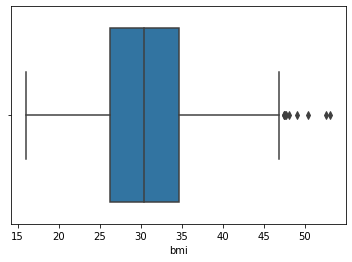

In [130]:
#zooming in bmi alone

sns.boxplot(x="bmi",data = data)

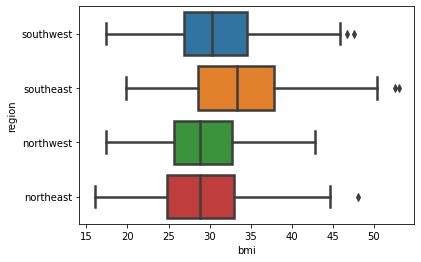

In [131]:
#plt.figure(figsize = (20,8))

ax = sns.boxplot(x="bmi" ,y="region", data=data, linewidth=2.5)
plt.show()

People in southwest has slightly more BMI compared to rest

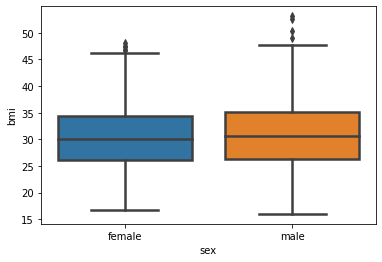

In [132]:
#plt.figure(figsize = (20,8))
sns.boxplot(x="sex" ,y="bmi", data=data, linewidth=2.5)
plt.show()

Male has more bmi outliers

<AxesSubplot:xlabel='sex', ylabel='expenses'>

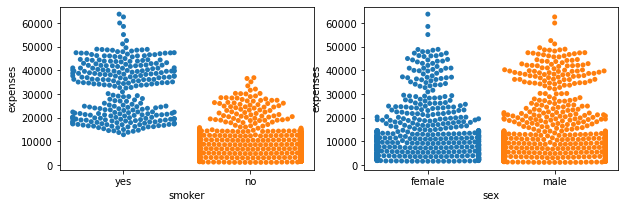

In [133]:
fig,axes=plt.subplots(1,2,figsize=(10,3))

sns.swarmplot(x=data['smoker'],
              y=data['expenses'],ax=axes[0])

sns.swarmplot(x=data['sex'],
              y=data['expenses'],ax=axes[1])

In [134]:
#One Hot Encoding
df=pd.get_dummies(data=data,drop_first=True)
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


smoker_yes          0.787234
age                 0.298308
bmi                 0.198637
region_southeast    0.073578
children            0.067389
sex_male            0.058045
region_northwest   -0.038695
region_southwest   -0.043637
dtype: float64


<AxesSubplot:>

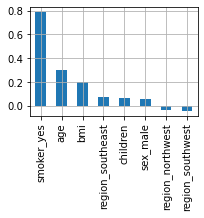

In [135]:
#Correlation Matrix
plt.figure(figsize=(3,2))
df_corr=df.drop(columns='expenses')
cor=df_corr.corrwith(df['expenses']).sort_values(ascending=False)
print(cor)

cor.plot.bar(grid=True)


In [136]:
df.corr()['expenses'].sort_values(ascending=False)

expenses            1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198637
region_southeast    0.073578
children            0.067389
sex_male            0.058045
region_northwest   -0.038695
region_southwest   -0.043637
Name: expenses, dtype: float64

<AxesSubplot:>

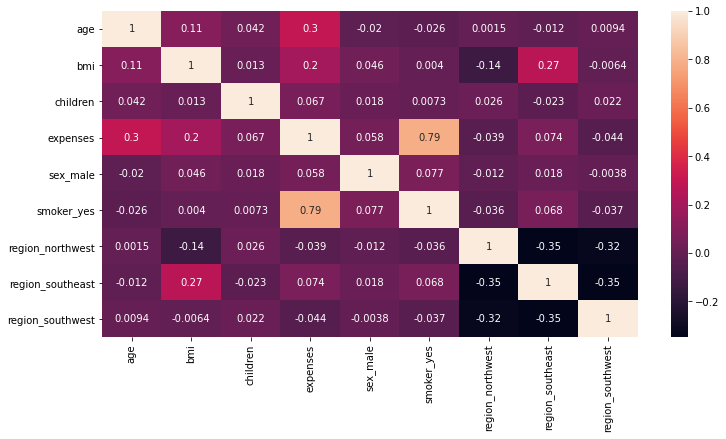

In [137]:
dcor=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(dcor,annot=True)

In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [151]:
#split data 90/10, 10% for prediction later

train_df=df.sample(frac = 0.90)
test_pred = df.sample(frac = 0.10)


In [152]:
test_pred.shape

(134, 9)

In [153]:
train_df.shape

(1203, 9)

# Preparing the data for training and testing


1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [154]:
#1)Divide our independent and dependent variable into X and y

#X = df.drop(columns = ['expenses'])
X = train_df.drop(['expenses'],axis=1)
y = train_df['expenses']

In [155]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
374,20,33.3,0,1,0,0,1,0
238,19,29.1,0,1,1,1,0,0
1058,24,39.5,0,0,0,0,1,0
1046,43,25.1,0,0,0,0,0,0
280,40,28.1,1,0,1,0,0,0


In [156]:
y.head()

374      1391.53
238     17352.68
1058     2480.98
1046     7325.05
280     22331.57
Name: expenses, dtype: float64

In [157]:
#splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [158]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(962, 8)
(962,)
(241, 8)
(241,)


# Feature Scaling

In [159]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [160]:
X_train

array([[-1.50360455, -1.10809424, -0.86943778, ..., -0.56854746,
        -0.61178895, -0.55733895],
       [ 1.75643997,  0.19415254,  0.79669597, ..., -0.56854746,
        -0.61178895, -0.55733895],
       [ 1.54382837,  0.89411018,  1.62976284, ..., -0.56854746,
        -0.61178895,  1.7942403 ],
       ...,
       [-1.43273402, -0.37558042, -0.86943778, ..., -0.56854746,
        -0.61178895,  1.7942403 ],
       [ 1.6146989 , -0.91275722, -0.86943778, ..., -0.56854746,
        -0.61178895,  1.7942403 ],
       [-1.43273402, -0.44069276,  1.62976284, ...,  1.75886811,
        -0.61178895, -0.55733895]])

In [161]:
X_test

array([[ 0.83512304, -0.09885298, -0.0363709 , ..., -0.56854746,
         1.63455062, -0.55733895],
       [-0.65315816,  2.03357611,  0.79669597, ..., -0.56854746,
         1.63455062, -0.55733895],
       [ 1.04773464,  0.84527593,  1.62976284, ...,  1.75886811,
        -0.61178895, -0.55733895],
       ...,
       [-1.00751082,  1.87079527, -0.0363709 , ..., -0.56854746,
         1.63455062, -0.55733895],
       [-0.51141709,  0.42204573,  1.62976284, ...,  1.75886811,
        -0.61178895, -0.55733895],
       [-1.50360455,  1.02433486, -0.86943778, ..., -0.56854746,
         1.63455062, -0.55733895]])

# Hyperparameter Tuning for  4 models

In [193]:
#Randomsearchcv

#datetime.now() 
hyperparameters= []

#MLR
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = RandomizedSearchCV(LinearRegression(),parameters, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
Accuracy=  grid.best_score_
Best_Parameters = grid.best_params_
Best_Estimator = grid.best_estimator_
hyperparameters.append({
    'Model' : 'LinearRegression',
    'Accuracy': Accuracy,
    'Best Parameters':Best_Parameters,
    'Best Estimator':Best_Estimator,
    'DateTime': pd.to_datetime(datetime.now())
})
hyperparameters

#svc
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid = RandomizedSearchCV(SVR(),parameters, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
Accuracy=  grid.best_score_
Best_Parameters = grid.best_params_
Best_Estimator = grid.best_estimator_
hyperparameters.append({
    'Model' : 'SupportVector',
    'Accuracy': Accuracy,
    'Best Parameters':Best_Parameters,
    'Best Estimator':Best_Estimator,
    'DateTime': pd.to_datetime(datetime.now())
})
hyperparameters

# Hyperparameter for GradientBoosting Regresssor
parameters={'n_estimators':[100], 
            'learning_rate': [0.1,0.05, 0.02, 0.01], 
            'max_depth':[6,4,6], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] }
           
grid = RandomizedSearchCV(GradientBoostingRegressor(),parameters, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
Accuracy=  grid.best_score_
Best_Parameters = grid.best_params_
Best_Estimator = grid.best_estimator_
hyperparameters.append({
    'Model' : 'GradientBoosting',
    'Accuracy': Accuracy,
    'Best Parameters':Best_Parameters,
    'Best Estimator': Best_Estimator,
    'DateTime': pd.to_datetime(datetime.now())
})
hyperparameters

#Randomforest
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

grid = RandomizedSearchCV(RandomForestRegressor(),parameters, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
Accuracy=  grid.best_score_
Best_Parameters = grid.best_params_
Best_Estimator = grid.best_estimator_
hyperparameters.append({
    'Model' : 'RandomForest',
    'Accuracy': Accuracy,
    'Best Parameters':Best_Parameters,
    'Best Estimator':Best_Estimator,
    'DateTime': pd.to_datetime(datetime.now())
})

hyperparameters


[{'Model': 'LinearRegression',
  'Accuracy': 0.7357288374859196,
  'Best Parameters': {'normalize': True,
   'fit_intercept': True,
   'copy_X': True},
  'Best Estimator': LinearRegression(normalize=True),
  'DateTime': Timestamp('2021-10-13 15:29:00.989832')},
 {'Model': 'SupportVector',
  'Accuracy': 0.3876626193467102,
  'Best Parameters': {'tol': 0.0001,
   'kernel': 'sigmoid',
   'gamma': 0.1,
   'C': 100},
  'Best Estimator': SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0.0001),
  'DateTime': Timestamp('2021-10-13 15:29:03.680006')},
 {'Model': 'GradientBoosting',
  'Accuracy': 0.8389681703556174,
  'Best Parameters': {'n_estimators': 100,
   'min_samples_leaf': 17,
   'max_features': 0.3,
   'max_depth': 6,
   'learning_rate': 0.05},
  'Best Estimator': GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=0.3,
                            min_samples_leaf=17),
  'DateTime': Timestamp('2021-10-13 15:29:08.906706')},
 {'Model': 'RandomForest',
  'Accuracy': 0.8342

In [194]:
hyperparams = pd.DataFrame(hyperparameters)
hyperparams

,Model,Accuracy,Best Parameters,Best Estimator,DateTime
0,LinearRegression,0.735729,"{'normalize': True, 'fit_intercept': True, 'co...",LinearRegression(normalize=True),2021-10-13 15:29:00.989832
1,SupportVector,0.387663,"{'tol': 0.0001, 'kernel': 'sigmoid', 'gamma': ...","SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0....",2021-10-13 15:29:03.680006
2,GradientBoosting,0.838968,"{'n_estimators': 100, 'min_samples_leaf': 17, ...",([DecisionTreeRegressor(criterion='friedman_ms...,2021-10-13 15:29:08.906706
3,RandomForest,0.834229,"{'n_estimators': 300, 'min_samples_split': 10,...","(DecisionTreeRegressor(max_depth=100, max_feat...",2021-10-13 15:30:34.533284


In [195]:
hyperparams['Best Estimator']

0                     LinearRegression(normalize=True)
1    SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0....
2    ([DecisionTreeRegressor(criterion='friedman_ms...
3    (DecisionTreeRegressor(max_depth=100, max_feat...
Name: Best Estimator, dtype: object

In [196]:
hyperparams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Model            4 non-null      object        
 1   Accuracy         4 non-null      float64       
 2   Best Parameters  4 non-null      object        
 3   Best Estimator   4 non-null      object        
 4   DateTime         4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
hyperparameter.to_csv('hyperparameter.csv',index=False)

In [ ]:
!pip install sqlalchemy

In [ ]:
import pyodbc
import urllib
from sqlalchemy import create_engine

quoted=urllib.parse.quote_plus('Driver={SQL Server};'
                      'Server=DESKTOP-A96I9EI;'
                      'Database=Insurance_Premium_Prediction;'
                      'Trusted_Connection=yes;')

df=pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP5\hyperparameter.csv')
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
df.to_sql('hyperparameter',con = engine, if_exists='replace',index=False)

pd.read_sql('hyperparameter',engine)

In [145]:
pd.read_sql('hyperparameter',engine)

NameError: name 'engine' is not defined

In [209]:
evaluation=[]

In [210]:
model_name = 'LinearRegressor'

mlr = LinearRegression(normalize=True)
import time
    
start = time.time()

#train model
mlr.fit(X_train,y_train)  
train_time = time.time() - start

#Test model
y_pred = mlr.predict(X_test)
#model_name=mlr.__class__.__name__

#Results
R2 =  metrics.r2_score(y_test,y_pred).round(3)
MSE =  metrics.mean_squared_error(y_test,y_pred).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
time = datetime.now()

evaluation.append({
    'Model' : model_name,
    'Train_time' : train_time,
    'Train_R2' : R2,
    'Train_MSE' : MSE,
    'Train_RMSE' : RMSE, 
    'DateTime': time
    })
    
evaluation

[{'Model': 'LinearRegressor',
  'Train_time': 0.00899505615234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 33, 57, 868610)}]

In [211]:
model_name = 'RandomForest'

rf = RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                        min_samples_split=12, n_estimators=200)
import time
    
start = time.time()

#train model
rf.fit(X_train,y_train)  
train_time = time.time() - start

#Test model
y_pred = rf.predict(X_test)
#model_name=rf.__class__.__name__

#Results
R2 =  metrics.r2_score(y_test,y_pred).round(3)
MSE =  metrics.mean_squared_error(y_test,y_pred).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
time = datetime.now()

evaluation.append({
    'Model' : model_name,
    'Train_time' : train_time,
    'Train_R2' : R2,
    'Train_MSE' : MSE,
    'Train_RMSE' : RMSE, 
    'DateTime': time
    })
    
evaluation

[{'Model': 'LinearRegressor',
  'Train_time': 0.00899505615234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 33, 57, 868610)},
 {'Model': 'RandomForest',
  'Train_time': 1.2165324687957764,
  'Train_R2': 0.858,
  'Train_MSE': 22564679.032,
  'Train_RMSE': 4750.229,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 7, 684455)}]

In [212]:
model_name = 'SVR'

svc = SVR(C=100, kernel='sigmoid', tol=0.0001)
import time
    
start = time.time()

#train model
svc.fit(X_train,y_train)  
train_time = time.time() - start

#Test model
y_pred = mlr.predict(X_test)
#model_name=svc.__class__.__name__

#Results
R2 =  metrics.r2_score(y_test,y_pred).round(3)
MSE =  metrics.mean_squared_error(y_test,y_pred).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
time = datetime.now()

evaluation.append({
    'Model' : model_name,
    'Train_time' : train_time,
    'Train_R2' : R2,
    'Train_MSE' : MSE,
    'Train_RMSE' : RMSE, 
    'DateTime': time
    })
    
evaluation

[{'Model': 'LinearRegressor',
  'Train_time': 0.00899505615234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 33, 57, 868610)},
 {'Model': 'RandomForest',
  'Train_time': 1.2165324687957764,
  'Train_R2': 0.858,
  'Train_MSE': 22564679.032,
  'Train_RMSE': 4750.229,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 7, 684455)},
 {'Model': 'SVR',
  'Train_time': 0.07295989990234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 9, 824232)}]

In [213]:
model_name='GradientBoosting'
gbr=GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=1.0,
                            min_samples_leaf=9)

import time
    
start = time.time()

#train model
gbr.fit(X_train,y_train)  
train_time = time.time() - start

#Test model
y_pred = gbr.predict(X_test)
#model_name=gbr.__class__.__name__

#Results
R2 =  metrics.r2_score(y_test,y_pred).round(3)
MSE =  metrics.mean_squared_error(y_test,y_pred).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(3)
time = datetime.now()

evaluation.append({
    'Model' : model_name,
    'Train_time' : train_time,
    'Train_R2' : R2,
    'Train_MSE' : MSE,
    'Train_RMSE' : RMSE, 
    'DateTime': time
    })
    
evaluation

[{'Model': 'LinearRegressor',
  'Train_time': 0.00899505615234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 33, 57, 868610)},
 {'Model': 'RandomForest',
  'Train_time': 1.2165324687957764,
  'Train_R2': 0.858,
  'Train_MSE': 22564679.032,
  'Train_RMSE': 4750.229,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 7, 684455)},
 {'Model': 'SVR',
  'Train_time': 0.07295989990234375,
  'Train_R2': 0.763,
  'Train_MSE': 37849556.49,
  'Train_RMSE': 6152.199,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 9, 824232)},
 {'Model': 'GradientBoosting',
  'Train_time': 0.3647918701171875,
  'Train_R2': 0.869,
  'Train_MSE': 20935907.979,
  'Train_RMSE': 4575.577,
  'DateTime': datetime.datetime(2021, 10, 13, 15, 34, 13, 64120)}]

In [214]:
evaluation = pd.DataFrame(evaluation)
evaluation

,Model,Train_time,Train_R2,Train_MSE,Train_RMSE,DateTime
0,LinearRegressor,0.008995,0.763,3.784956e+07,6152.199,2021-10-13 15:33:57.868610
1,RandomForest,1.216532,0.858,2.256468e+07,4750.229,2021-10-13 15:34:07.684455
2,SVR,0.072960,0.763,3.784956e+07,6152.199,2021-10-13 15:34:09.824232
3,GradientBoosting,0.364792,0.869,2.093591e+07,4575.577,2021-10-13 15:34:13.064120


In [ ]:
import pyodbc
import urllib
from sqlalchemy import create_engine

quoted=urllib.parse.quote_plus('Driver={SQL Server};'
                      'Server=DESKTOP-A96I9EI;'
                      'Database=Insurance_Premium_Prediction;'
                      'Trusted_Connection=yes;')

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
evaluation.to_sql('evaluation',con = engine, if_exists='replace',index=False)

pd.read_sql('evaluation',engine)

In [108]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Model       4 non-null      object        
 1   Train_time  4 non-null      float64       
 2   Train_R2    4 non-null      float64       
 3   Train_MSE   4 non-null      float64       
 4   Train_RMSE  4 non-null      float64       
 5   DateTime    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 320.0+ bytes


# Predicting Test Set Results

In [244]:
X_test_pred = test_pred.drop(['expenses'],axis=1)
y_test_pred = test_pred['expenses']


163      5152.13
120      7740.34
921     13462.52
991      7144.86
586      3861.21
          ...   
1098    23045.57
405     11396.90
985      7624.63
40       3046.06
420     46889.26
Name: expenses, Length: 134, dtype: float64

In [248]:
print(y_test_pred.shape)
print(X_test_pred.shape)

(134,)
(134, 8)


In [249]:
X_test_pred = sc.transform(X_test_pred)
X_test_pred


array([[-0.61109512, -0.1598748 ,  0.80397906, ..., -0.58309519,
        -0.59458839,  1.82279473],
       [ 0.24710658,  1.09828714,  0.80397906, ..., -0.58309519,
        -0.59458839,  1.82279473],
       [ 1.53440913,  0.42611843, -0.91975204, ..., -0.58309519,
        -0.59458839,  1.82279473],
       ...,
       [ 0.24710658, -0.8492786 , -0.05788649, ..., -0.58309519,
        -0.59458839,  1.82279473],
       [-1.18322958, -0.71139784, -0.91975204, ..., -0.58309519,
        -0.59458839, -0.54860812],
       [ 1.67744275,  0.5467641 , -0.91975204, ..., -0.58309519,
         1.68183573, -0.54860812]])

In [250]:
pred_test = gbr.predict(X_test_pred)
pred_test.round(2)

array([ 6493.62,  9400.53, 13448.31,  8464.83,  6296.9 , 23203.89,
       14998.02,  7019.81,  6775.04,  5860.76, 16557.11,  9833.83,
        3608.66,  3439.75,  4560.92,  5918.47,  2821.35, 23937.43,
       11720.5 ,  5159.42, 10717.28, 16026.08,  6354.92,  6306.36,
       17106.12, 19663.12,  4876.42, 14347.27, 23489.81,  7970.62,
       17207.5 , 24224.22, 12188.  ,  3522.46,  6258.74, 12234.4 ,
        6487.54,  9873.01, 12242.48, 21339.  , 10203.57, 13483.5 ,
        4002.3 ,  7571.11,  8246.48,  2805.94,  3752.79, 22910.74,
        9760.16, 14222.  ,  5496.21, 14388.52,  7323.97,  4322.47,
       11262.64, 11414.11, 12092.72, 10191.56, 39830.54,  2711.19,
       16836.83, 14622.64, 11418.88,  7612.09,  3086.56,  3693.71,
        7789.53,  7060.43,  8284.23, 21115.42,  3438.13,  6467.83,
       47542.8 , 13312.19, 16123.66,  2197.9 ,  7642.77,  9645.04,
       33577.89, 11227.62, 13564.93,  8968.17, 11601.3 ,  3301.9 ,
        4973.56, 11454.78, 20257.31, 42576.7 ,  9314.69, 13702

<AxesSubplot:xlabel='expenses', ylabel='Density'>

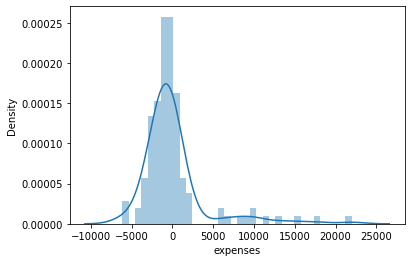

In [251]:
sns.distplot(y_test_pred - pred_test)

In [262]:
compare = pd.DataFrame({"Actual": y_test_pred, 
                           "Predicted": pred_test,
                         "Difference": (pred_test - y_test_pred).round(2)
                       })
compare.head()
#compare.sort_values(by='Difference')

,Actual,Predicted,Difference
163,5152.13,6493.616568,1341.49
120,7740.34,9400.526758,1660.19
921,13462.52,13448.310840,-14.21
991,7144.86,8464.825329,1319.97
586,3861.21,6296.896666,2435.69


In [263]:
import pyodbc
import urllib
from sqlalchemy import create_engine

quoted=urllib.parse.quote_plus('Driver={SQL Server};'
                      'Server=DESKTOP-A96I9EI;'
                      'Database=Insurance_Premium_Prediction;'
                      'Trusted_Connection=yes;')

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

compare.to_sql('compare',con = engine, if_exists='replace',index=False)

pd.read_sql('compare',engine)

,Actual,Predicted,Difference
0,5152.13,6493.616568,1341.49
1,7740.34,9400.526758,1660.19
2,13462.52,13448.310840,-14.21
3,7144.86,8464.825329,1319.97
4,3861.21,6296.896666,2435.69
...,...,...,...
129,23045.57,11814.810694,-11230.76
130,11396.90,13202.189702,1805.29
131,7624.63,8682.721364,1058.09
132,3046.06,4012.980720,966.92


In [253]:
model_name = 'GradientBoosting'
R2 =  metrics.r2_score(y_test_pred,pred_test).round(3)
MSE =  metrics.mean_squared_error(y_test_pred,pred_test).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_pred,pred_test)).round(3)
#time = datetime.now()

test_accuracy = pd.Series({
    'Model' : model_name,
    'Test_R2' : R2,
    'Test_MSE' : MSE,
    'Test_RMSE' : RMSE 
    })

test_accuracy


Model        GradientBoosting
Test_R2                 0.839
Test_MSE         16454857.732
Test_RMSE            4056.459
dtype: object

In [254]:
_= pd.DataFrame(test_accuracy).T
_

,Model,Test_R2,Test_MSE,Test_RMSE
0,GradientBoosting,0.839,16454857.732,4056.459


In [255]:
_.dtypes

Model        object
Test_R2      object
Test_MSE     object
Test_RMSE    object
dtype: object

In [256]:
_['Test_R2'] = _['Test_R2'].astype(float)
_['Test_MSE'] = _['Test_MSE'].astype(float)
_['Test_RMSE'] = _['Test_RMSE'].astype(float)

In [129]:
_.dtypes

Model         object
Test_R2      float64
Test_MSE     float64
Test_RMSE    float64
dtype: object

In [257]:
evaluation.dtypes

Model                 object
Train_time           float64
Train_R2             float64
Train_MSE            float64
Train_RMSE           float64
DateTime      datetime64[ns]
dtype: object

In [258]:
Accuracy=evaluation.join(_.set_index('Model'), on='Model')
Accuracy  

,Model,Train_time,Train_R2,Train_MSE,Train_RMSE,DateTime,Test_R2,Test_MSE,Test_RMSE
0,LinearRegressor,0.008995,0.763,3.784956e+07,6152.199,2021-10-13 15:33:57.868610,NaN,NaN,NaN
1,RandomForest,1.216532,0.858,2.256468e+07,4750.229,2021-10-13 15:34:07.684455,NaN,NaN,NaN
2,SVR,0.072960,0.763,3.784956e+07,6152.199,2021-10-13 15:34:09.824232,NaN,NaN,NaN
3,GradientBoosting,0.364792,0.869,2.093591e+07,4575.577,2021-10-13 15:34:13.064120,0.839,1.645486e+07,4056.459


In [259]:
Accuracy = Accuracy[['Model','Train_time','Train_R2','Train_MSE','Train_RMSE','Test_R2','Test_MSE','Test_RMSE','DateTime']]
Accuracy

,Model,Train_time,Train_R2,Train_MSE,Train_RMSE,Test_R2,Test_MSE,Test_RMSE,DateTime
0,LinearRegressor,0.008995,0.763,3.784956e+07,6152.199,NaN,NaN,NaN,2021-10-13 15:33:57.868610
1,RandomForest,1.216532,0.858,2.256468e+07,4750.229,NaN,NaN,NaN,2021-10-13 15:34:07.684455
2,SVR,0.072960,0.763,3.784956e+07,6152.199,NaN,NaN,NaN,2021-10-13 15:34:09.824232
3,GradientBoosting,0.364792,0.869,2.093591e+07,4575.577,0.839,1.645486e+07,4056.459,2021-10-13 15:34:13.064120


In [260]:
import pyodbc
import urllib
from sqlalchemy import create_engine

quoted=urllib.parse.quote_plus('Driver={SQL Server};'
                      'Server=DESKTOP-A96I9EI;'
                      'Database=Insurance_Premium_Prediction;'
                      'Trusted_Connection=yes;')

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

Accuracy.to_sql('Accuracy',con = engine, if_exists='replace',index=False)

pd.read_sql('Accuracy',engine)

,Model,Train_time,Train_R2,Train_MSE,Train_RMSE,Test_R2,Test_MSE,Test_RMSE,DateTime
0,LinearRegressor,0.008995,0.763,3.784956e+07,6152.199,NaN,NaN,NaN,2021-10-13 15:33:57.867
1,RandomForest,1.216532,0.858,2.256468e+07,4750.229,NaN,NaN,NaN,2021-10-13 15:34:07.683
2,SVR,0.072960,0.763,3.784956e+07,6152.199,NaN,NaN,NaN,2021-10-13 15:34:09.823
3,GradientBoosting,0.364792,0.869,2.093591e+07,4575.577,0.839,1.645486e+07,4056.459,2021-10-13 15:34:13.063
